In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm

In [67]:
def dft_freq_phase(xn,N):
    res = []
    for k in range(0, N):
        sum = 0
        for i in range(0, N):
            sum += xn[i] * np.exp(-1j * 2 * np.pi * i * k / N)
        res.append(sum)

    freq = np.fft.fftfreq(N)
        
    xn_phase = []
    for i in range(0, N):
        xn_phase.append(cm.phase(res[i]))
    
    return {
        "dft": res,
        "freq": freq,
        "phase": xn_phase
    }

## Question 1

Compute the 8-point DFT of the following sequences. Plot the magnitude 
	and phase spectrum. Observe the symmetry properties
	
	a.  $x[n] = \{1,1,0,0,0,0,0,1\}$
	b. $x[n] = \{0,1,1,0,0,0,-1,-1\}$

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


<StemContainer object of 3 artists>

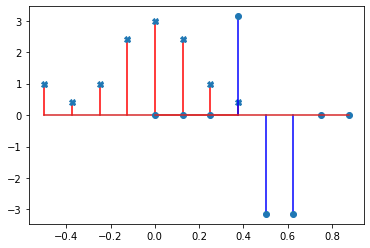

In [68]:
x1 = [1,1,0,0,0,0,0,1]
x2 = [0,1,1,0,0,0,-1,-1]
N = 8

x1_dft = dft_freq_phase(x1,N)

plt.stem(x1_dft["freq"], np.abs(x1_dft["dft"]), linefmt = 'R', markerfmt = 'X')

plt.stem(freq, x1_dft["phase"], linefmt = 'B')

## Question 2

Generate the finite duration sequence $x[n]= 0.5 (1-\cos(\pi n/20))$, $0\leq n <20$.  

      a.  Append the sequence with sufficient number of zeros to compute the DFT of the sequence with length              N=32 and 256. Plot the DFT and comment on the effects of zero padding.
        
	b.  Insert 16 zeros in the middle of the sequence and perform a DFT with N=32.
	Note the difference in the spectrum
        
	c.  Insert 16 zeros in the beginning of the sequence and repeat.


/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


<StemContainer object of 3 artists>

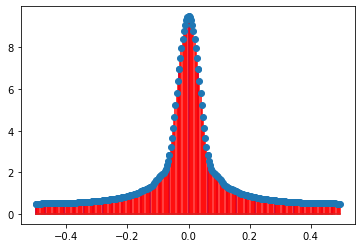

In [71]:
n = 20

N1 = 32
N2 = 256

def xa(N):
    res = []
    for i in range(0, n):
        res.append(0.5 * (1 - np.cos(np.pi * i / 20)))
    for i in range(n, N):
        res.append(0)
    return res

plt.stem(dft_freq_phase(xa(N1), N1)["freq"], np.abs(dft_freq_phase(xa(N1), N1)["dft"]), linefmt = 'B')
plt.stem(dft_freq_phase(xa(N2), N2)["freq"], np.abs(dft_freq_phase(xa(N2), N2)["dft"]), linefmt = 'R')

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

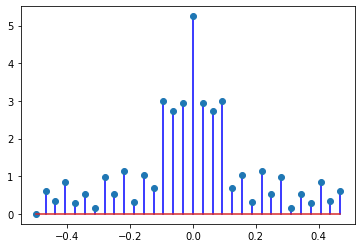

In [74]:
def xb(N):
    res = []
    for i in range(0, int(n/2)):
        res.append(0.5 * (1 - np.cos(np.pi * i / 20)))
    for i in range(int(n/2), int(n/2) + 16):
        res.append(0)
    for i in range(int(n/2) + 16, N):
        res.append(0.5 * (1 - np.cos(np.pi * i / 20)))
    return res

plt.stem(dft_freq_phase(xb(N1), N1)["freq"], np.abs(dft_freq_phase(xb(N1), N1)["dft"]), linefmt = 'B')

## Question 3

Plot the $32$ point DFT of the following signals and comment on
	the spectral estimate.
	
	a. $x[n] = \cos (3\pi n / 8 )$
	b. $x[n] = \cos (3\pi n / 16)$
	c. $x[n] = \cos (3\pi n / 17)$


## Question 4

Estimation of signal corrupted by noise: 
	Generate the signal $ s[n] = \cos(\pi 5 n/32) + \cos(\pi 21 n/64)$ for 
	256 samples.  Generate a noisy version of the signal $x[n]$ by adding 
	white gaussian noise $e[n]$ with variance $0.3$ (use function {\em randn} 
	to generate the noise) to the original signal $s[n]$. Compute the energy 
	in the error signal $\sum_n (x[n] - s[n])^2$.
	

a. Plot the 256 point DFTs $S[k]$ and $X[k]$. Find the set 
	$\mathcal{S}_{nz}$ of the values of $k$ for which $S[k]$ is non-zero.
	Find $\hat{X}[k] = X[k]$ if $k\in \mathcal{S}_{nz}$
	and zero otherwise.  
    
   b. Find the IDFT $\hat{x}[n]$ from $\hat{X}[k]$ to 
      recover the original signal.  Plot $\hat{x}[n]$.  Find the error signal 
	 energy after recovery $\sum_n (\hat{x}[n] - s[n])^2$
	

## Question 5

Consider the sequence $x[n]=n$ for $0 \leqslant n \leqslant 8$, compute and plot N-point DFT of $x[n]$ for 
	$N=5, 8,$ and $16$. Also, compute and plot IDFT of these N-DFT's for the values $n=-25:25$. Make out
	the inferences which carry marks. (Use summuation formula to do this problem) 

## Question 6

Generate the $8 \times 8$ DFT Matrix, and show that the Normalized DFT matrix is Unitary Matrix.  

## Question 7

Find the Linear convolution between the following sequences

	a. $x[n] = \{\textbf{1},3,-2,1\}$ 
	b. $h[n] = \{\textbf{1},1\}$
		

using the Circualr convolution.

## Question 8

Find the Linear convolution between the following sequences 

 a. $x[n] = \{1,1,0,0,0,0,0,1\}$
 b. $h[n] = \{0,1,1,0,0,0,-1,-1,-1\}$

using DFT Method. (Use FFT command to do this.)
